In [1]:
from lsst.sims.featureScheduler.observatory import Slewtime_pre
import healpy as hp
import numpy as np
%matplotlib inline
from lsst.sims.utils import _hpid2RaDec
import matplotlib.pylab as plt

In [2]:
nside = 128
hpids = np.arange(hp.nside2npix(nside))
az, alt = _hpid2RaDec(nside, hpids)
tomask = np.where(alt < np.radians(20.))
good = np.where(alt > np.radians(20.))
result = az*0
result[tomask] = hp.UNSEEN

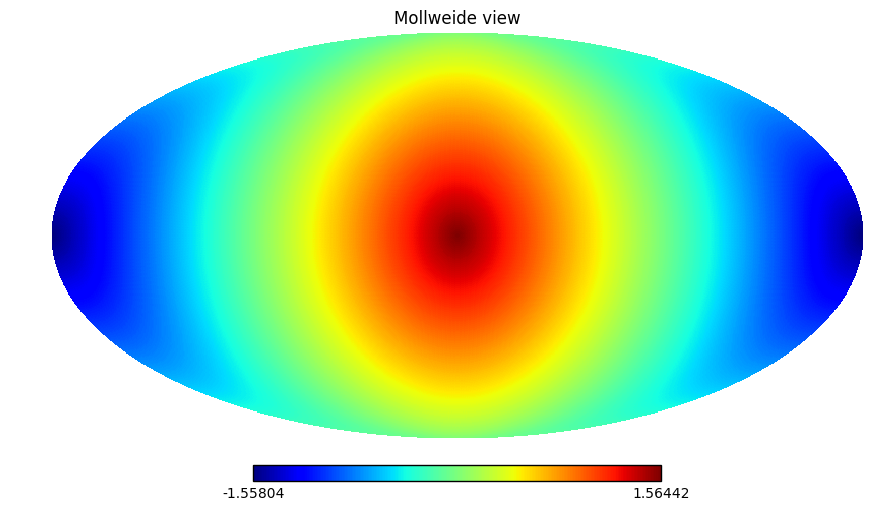

In [3]:
hp.mollview(alt, rot=(0,90,0))

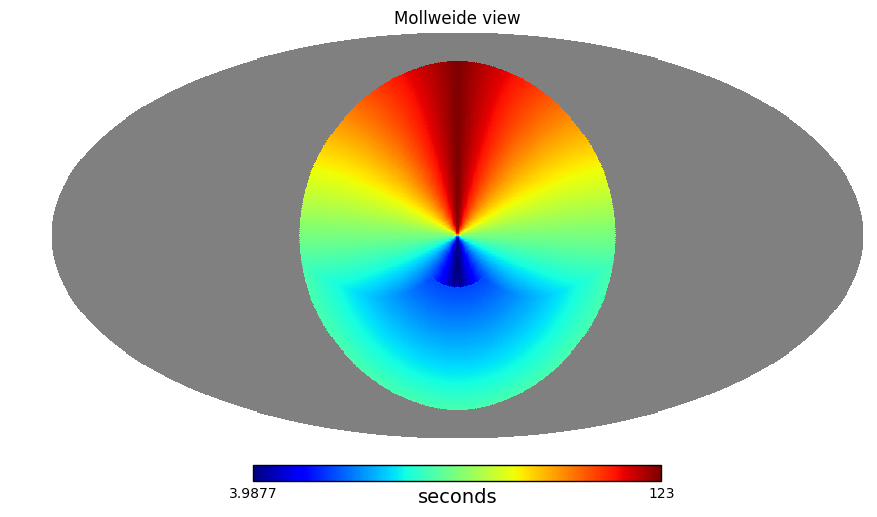

In [7]:
slewtime = Slewtime_pre()
# let's see how long it takes to slew various places 
alt_current = np.radians(80.)
az_current = 0.

result[good] = slewtime(alt_current, az_current, alt[good], az[good])
hp.mollview(result, rot=(0,90,0), unit='seconds')

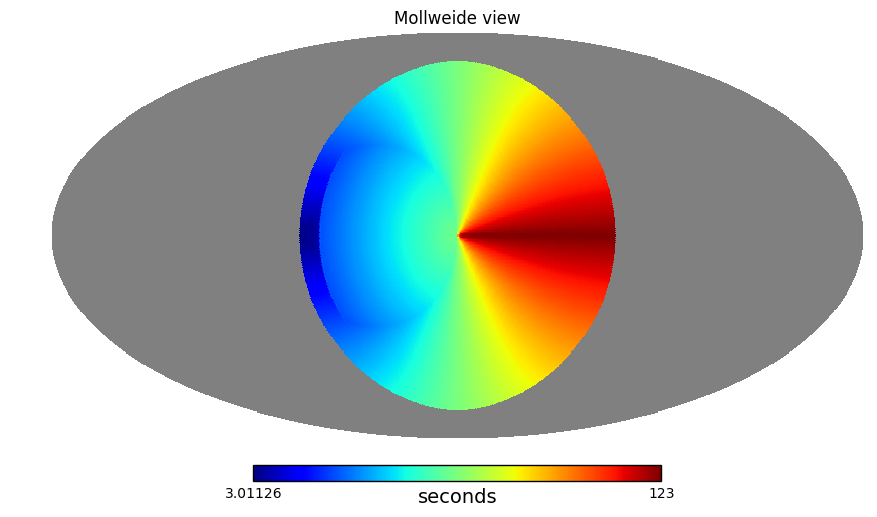

In [12]:
alt_current = np.radians(20.)
az_current = np.radians(90.)

result[good] = slewtime(alt_current, az_current, alt[good], az[good])
hp.mollview(result, rot=(0,90,0), unit='seconds')